# **TMA4215 - Project part 1**

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import sympy 
import pandas as pd
from scipy.special import factorial

import tqdm

newparams = {'figure.figsize': (8.0, 6.0), 'axes.grid': True,
             'lines.markersize': 6, 'lines.linewidth': 1,
             'font.size': 10}
plt.rcParams.update(newparams)

___
## Task *a*

In [50]:
def lagrange_polys(x, xs, ys):
    """
    Evaluates the Lagrange interpolating polynomial as a symbolic expression in x.

    Parameters
    ----------
    x : sympy.Symbol
        The symbolic variable for the polynomial.
    xs : array-like
        The x-coordinates of the known data points.
    ys : array-like
        The y-coordinates of the known data points.

    Returns
    -------
    sympy.Expr
        The symbolic Lagrange interpolating polynomial in x.
    """
    n = len(xs)
    ls = [[reduce(lambda x,y:x*y, [(x - xs[j])/(xs[i] - xs[j]) for j in range(n) if j != i])] for i in range(n)]
    # reduces all the products using lambda function for every i when i!=j
    return reduce(lambda x,y:x+y, np.array(ys)@np.array(ls))
    # sums up all the products of y_i and l_i(x)

In [51]:
def lagrange_func(n, a, b, f, nodes_str='equidistant'):
    """
    Constructs the Lagrange interpolating polynomial as a callable function.

    Parameters
    ----------
    n : int
        The degree of the polynomial (number of nodes - 1).
    a : float
        The start of the interval.
    b : float
        The end of the interval.
    f : callable
        The function to interpolate.
    nodes : str, optional
        The type of nodes to use ('equidistant' or 'chebyshev'). Default is 'equidistant'.

    Returns
    -------
    tuple
        (nodes used, callable function)
    """
    if nodes_str not in ['equidistant', 'chebyshev']:
        raise ValueError("nodes must be 'equidistant' or 'chebyshev'")
    
    transform_nodes = lambda x: 0.5*(b-a)*x + 0.5*(a+b) # function to transform nodes from [-1,1] to [a,b]
    x = sympy.symbols('x') # symbolic variable using sympy


    if nodes_str == 'equidistant':
        nodes = np.linspace(-1, 1, n+1)
        eq_nodes = transform_nodes(nodes)
        y_eq = lagrange_polys(x, eq_nodes, f(eq_nodes))
        lagrange_eq_func = sympy.lambdify(x, y_eq, modules=['numpy'])
        return eq_nodes, lagrange_eq_func
    
    elif nodes_str == 'chebyshev':
        nodes = np.cos((2*np.arange(n+1)+1)/(2*n+2)*np.pi)
        cheb_nodes = transform_nodes(nodes)
        y_cheb = lagrange_polys(x, cheb_nodes, f(cheb_nodes))
        lagrange_cheb_func = sympy.lambdify(x, y_cheb, modules=['numpy'])
        return cheb_nodes, lagrange_cheb_func

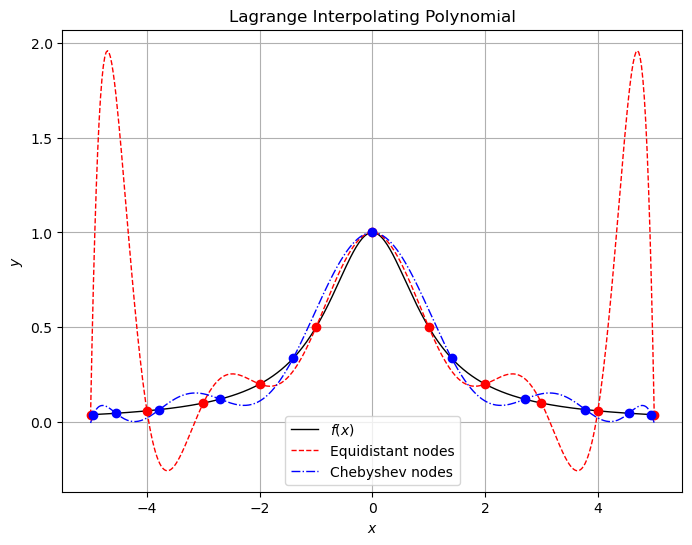

In [ ]:
n = 10
a, b = -5, 5

f = lambda x: 1/(1+x**2) # Runge's function
xs = np.linspace(a, b, 400)
ys = f(xs)

eq_nodes, eq_func = lagrange_func(n, a, b, f, nodes_str='equidistant')
cheb_nodes, cheb_func = lagrange_func(n, a, b, f, nodes_str='chebyshev')

plt.plot(xs, ys, 'k-', label='$f(x)$')
plt.plot(xs, eq_func(xs), 'r--', label='Equidistant nodes')
plt.plot(xs, cheb_func(xs), 'b-.', label='Chebyshev nodes')
plt.plot(eq_nodes, f(eq_nodes), 'ro')
plt.plot(cheb_nodes, f(cheb_nodes), 'bo')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Lagrange Interpolating Polynomial')
plt.show()

The plot shows the Runge function, approximated by two lagrange interpolations polynomials. One with Chebyshev nodes and one with equidistant nodes. Chebyshev nodes results in a much smaller error on the edges of the function, than the equidistant nodes.

___
## Task *b*

In this task we consider the two functions
$$
f_1(x)=\cos(2\pi x),\quad x\in[0,1],
$$
$$
f_2(x)=e^{3x}\sin(2x),\quad x\in[0,\pi/4].
$$

Furthermore, we estimate $\lVert f - p_n\rVert$, where $\lVert\cdot\rVert$ denotes either the max-norm ($L^\infty$) or the $L^2$-norm on $[a,b]$, for various values of $n$. We approximate these norms using a uniform evaluation grid $\{\eta_i\}_{i=0}^{N}$ on $[a,b]$ with step $h=(b-a)/N$ (we take $N=100\,n$, so there are $N{+}1$ sample points). The discrete estimates are
$$
\lVert f - p_n\rVert_{\infty}\ \approx\ \max_{0\le i\le N}\, \bigl|f(\eta_i)-p_n(\eta_i)\bigr|,
$$
$$
\lVert f - p_n\rVert_{2}\ \approx\ \Bigl(h\sum_{i=0}^{N} \bigl(f(\eta_i)-p_n(\eta_i)\bigr)^2\Bigr)^{1/2}
\ =\ \frac{\sqrt{b-a}}{\sqrt{N}}\,
\left(\sum_{i=0}^{N} \bigl(f(\eta_i)-p_n(\eta_i)\bigr)^2\right)^{1/2}.
$$

We also compare the numerical results for $f_1$ on $[0,1]$ with a theoretical error bound. Assume $f\in C^{n+1}[a,b]$, let distinct nodes $x_0,\dots,x_n\in[a,b]$, and let $p_n$ be the degree-$n$ interpolating polynomial of $f$ at these nodes. Then for each $x\in[a,b]$ there exists $\xi=\xi(x)\in(a,b)$ such that
$$
f(x)-p_n(x)=\frac{f^{(n+1)}(\xi(x))}{(n+1)!}\,\prod_{j=0}^{n}(x-x_j).
$$
Define the nodal polynomial
$$
\omega_{n+1}(x)=\prod_{j=0}^{n}(x-x_j),
$$
and set
$$
M_{n+1}=\max_{\xi\in[a,b]}\bigl|f^{(n+1)}(\xi)\bigr|.
$$
Then
$$
\max_{x\in[a,b]}\bigl|f(x)-p_n(x)\bigr|
\ \le\ \frac{M_{n+1}}{(n+1)!}\,\max_{x\in[a,b]}\bigl|\omega_{n+1}(x)\bigr|.
$$

For $f(x)=\cos(2\pi x)$ and any integer $k\ge 0$,
$$
f^{(k)}(x)=(2\pi)^k\cos\!\left(2\pi x+\frac{k\pi}{2}\right),
\qquad
\lVert f^{(k)}\rVert_{\infty}=(2\pi)^k\ \text{on}\ [0,1].
$$
Using $|x-x_j|\le 1$ for $x,x_j\in[0,1]$ gives the crude, node-independent bound
$$
\lVert f-p_n\rVert_{\infty}
\le
\frac{\lVert f^{(n+1)}\rVert_{\infty}}{(n+1)!}\,\max_{x\in[0,1]}\bigl|\omega_{n+1}(x)\bigr|
\le
\frac{(2\pi)^{n+1}}{(n+1)!}.
$$
Thus, for any node set in $[0,1]$,
$$
\lVert f-p_n\rVert_{\infty}\ \le\ \frac{(2\pi)^{n+1}}{(n+1)!}.
$$

We can improve the bound by taking Chebyshev nodes mapped to $[0,1]$. Let $t_0,\dots,t_n$ be the $n{+}1$ zeros of $T_{n+1}$ on $[-1,1]$. Then
$$
\prod_{j=0}^{n}(t-t_j)=2^{-n}T_{n+1}(t),\qquad |T_{n+1}(t)|\le 1\ \text{for }t\in[-1,1].
$$
Mapping $[-1,1]\to[0,1]$ via $x=\tfrac{t+1}{2}$ gives $x_j=\tfrac{t_j+1}{2}$ and
$$
\omega_{n+1}(x)=\prod_{j=0}^{n}(x-x_j)
=\prod_{j=0}^{n}\frac{t-t_j}{2}
=2^{-(n+1)}\prod_{j=0}^{n}(t-t_j)
=2^{-(2n+1)}\,T_{n+1}(t).
$$
Therefore,
$$
\max_{x\in[0,1]}\bigl|\omega_{n+1}(x)\bigr|\ \le\ 2^{-(2n+1)}.
$$
Plugging into the remainder bound with $\lVert f^{(n+1)}\rVert_{\infty}=(2\pi)^{n+1}$ yields
$$
\lVert f-p_n\rVert_{\infty} \le \frac{(2\pi)^{n+1}}{(n+1)!}\,2^{-(2n+1)} = \boxed{ \frac{\pi^{\,n+1}}{2^{\,n}(n+1)!}}.
$$

*Note*, we can apply a similar argument to  $f_2$ to rach a similar bound on the form $\frac{(C)^{n+1}}{(n+1)!}$ with a constant $C\ge0$. That is $\lim_{n \to \infty} \lVert f-p_n\rVert_{\infty} = \lim_{n \to \infty}\frac{(C)^{n+1}}{(n+1)!} = 0$ for both $f_1$ and $f_2$, meaning the interpolation polynomial converges regardless of nodes. We also know that $ \lVert f-p_n\rVert_{L^2(a, b)} \le \sqrt{b-a}\lVert f-p_n\rVert_{\infty}$ so convergence in $L^{\infty}$ implies convergence in $L^2$.

In [248]:
def error_lagrange(n, a, b, f, nodes_str):
    """
    Computes the maximum and L2 norm errors for the Lagrange interpolating polynomial.

    Parameters
    ----------
    n : int
        The degree of the Lagrange polynomial.
    a : float
        The start of the interval.
    b : float
        The end of the interval.
    f : callable
        The function to interpolate.

    Returns
    -------
    tuple
        A tuple containing:
        - err_max (float): The maximum norm error (L∞ norm).
        - err_2 (float): The L2 norm error.
    """
    N = 100*n
    nodes, pn = lagrange_func(n, a, b, f, nodes_str=nodes_str)
    xs = np.linspace(a, b, N)
    f_vals = f(xs)
    vals = pn(xs)
    err_max = np.max(np.abs(f_vals - vals)) # max norm error for Chebyshev nodes
    err_2 = np.sqrt((b-a)/N * np.sum((f_vals - vals)**2)) # L2 norm error for Chebyshev nodes
    return err_max, err_2

In [249]:
n_values = np.linspace(2, 22, 10, dtype=int) # n values to test

err_bnd = lambda n: (np.power(np.pi, n+1)/(2**(n)*factorial(n+1)))
err_bnd_values = err_bnd(n_values)

a, b = 0, 1 # interval
f_1 = lambda x: np.cos(2*np.pi*x) # function to interpolate
errors_f1 = []
for n in tqdm.tqdm(n_values): # tqdm for progress bar
    err_max, err_2 = error_lagrange(n, a, b, f_1, nodes_str='chebyshev')
    errors_f1.append((err_max, err_2))
errors_f1 = np.array(errors_f1)

a, b = 0, np.pi/4 # interval
f_2 = lambda x: np.exp(3*x)*np.sin(2*np.pi*x) # function to interpolate
errors_f2 = []
for n in tqdm.tqdm(n_values): # tqdm for progress bar
    err_max, err_2 = error_lagrange(n, a, b, f_2, nodes_str='chebyshev')
    errors_f2.append((err_max, err_2))
errors_f2 = np.array(errors_f2)


100%|██████████| 10/10 [00:01<00:00,  9.18it/s]


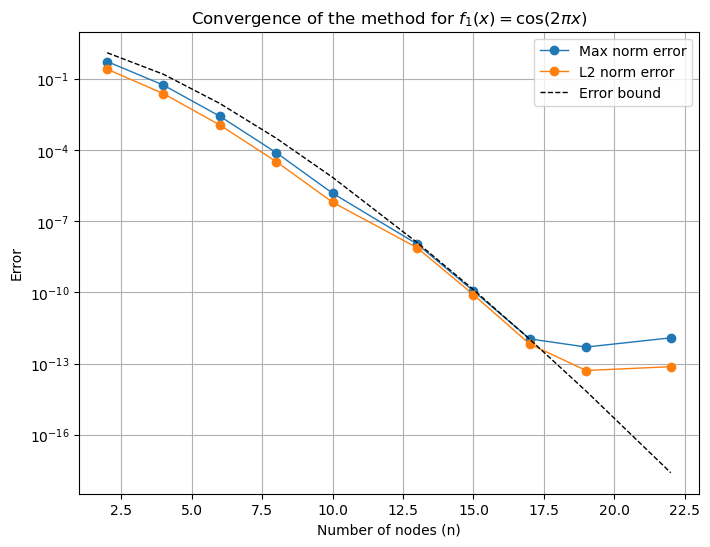

In [250]:
plt.semilogy(n_values, errors_f1[:, 0], 'o-', label='Max norm error')
plt.semilogy(n_values, errors_f1[:, 1], 'o-', label='L2 norm error')
plt.semilogy(n_values, err_bnd(n_values), 'k--', label='Error bound')
plt.xlabel('Number of nodes (n)')
plt.ylabel('Error')
plt.title(r'Convergence of the method for $f_1(x) = \cos(2\pi x)$')
plt.legend()
plt.grid(True)
plt.show()


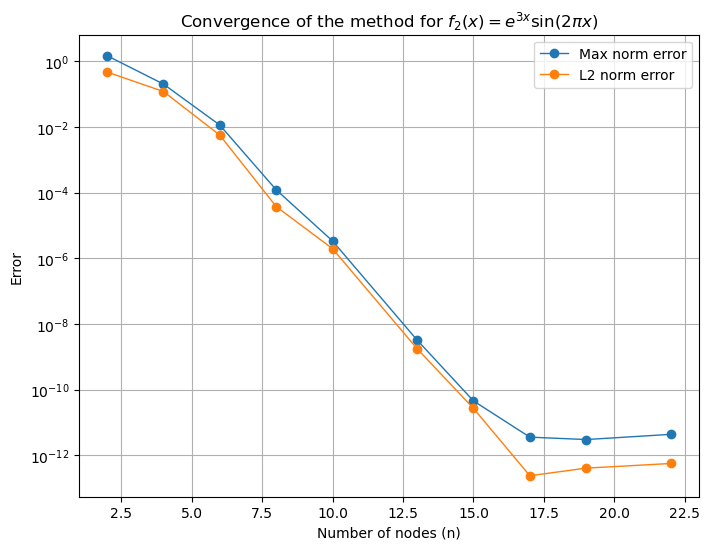

In [251]:
plt.semilogy(n_values, errors_f2[:, 0], 'o-', label='Max norm error')
plt.semilogy(n_values, errors_f2[:, 1], 'o-', label='L2 norm error')
plt.xlabel('Number of nodes (n)')
plt.ylabel('Error')
plt.title(r'Convergence of the method for $f_2(x) = e^{3x} \sin(2\pi x)$')
plt.legend()
plt.grid(True)
plt.show()

The figures show the empirical interpolation error in the $L^\infty$ and $L^2$ norms for $f_1(x)$ and $f_2(x)$ with $n\in\{2,4,6,8,10,13,15,17,19,22\}$. The error decreases rapidly up to $n=17$ (reaching about $10^{-11}$). For larger $n$ the curves level off and may increase slightly. This saturation is caused by numerical effects: evaluating the Lagrange basis (or solving for coefficients) in double precision is ill-conditioned, so roundoff dominates the true approximation error. Thus the plateau reflects computational limits rather than theory. Since the error is already below $10^{-11}$ by $n=17$, the interpolants have effectively converged at the plotted scales. For $f_1(x)$, the theoretical upper bound tracks the measured error closely for $n=2,4,6,8,10,13,15,17$, indicating that it is tight in this regime.

___
## Task *c*

In [252]:
def splines(K, n, a, b, f):
    """
    Constructs a list of Lagrange interpolating polynomials for subintervals.

    Parameters
    ----------
    K : int
        The number of subintervals to divide the interval [a, b].
    n : int
        The degree of the Lagrange polynomial for each subinterval.
    a : float
        The start of the interval.
    b : float
        The end of the interval.
    f : callable
        The function to interpolate.

    Returns
    -------
    list
        A list of tuples, where each tuple contains:
        - A tuple representing the subinterval (x0, x1).
        - A callable function representing the Lagrange polynomial for the subinterval.
    """
    vi = np.linspace(a, b, K+1)
    result = []
    for i in range(K):
        _, pn = lagrange_func(n, vi[i], vi[i+1], f, nodes_str='equidistant')
        result.append(((vi[i], vi[i+1]), pn))
    return result

In [253]:
def error_splines(K, n, a, b, f, N):
    """
    Computes the maximum norm error for spline interpolation.

    Parameters
    ----------
    K : int
        The number of subintervals to divide the interval [a, b].
    n : int
        The degree of the Lagrange polynomial for each subinterval.
    a : float
        The start of the interval.
    b : float
        The end of the interval.
    f : callable
        The function to interpolate.
    N : int
        The number of evaluation points in the interval [a, b].

    Returns
    -------
    float
        The maximum norm error between the true function values and the spline interpolation.
    """
    spl = splines(K, n, a, b, f)
    xs = np.linspace(a, b, N)
    f_vals = f(xs)
    spline_vals = np.zeros_like(xs)
    for k, ((x0, x1), pn) in enumerate(spl):
        left_ok  = (xs >= x0) if k == 0 else (xs >  x0)
        right_ok = (xs <= x1) if k == len(spl)-1 else (xs <  x1)
        mask = left_ok & right_ok
        spline_vals[mask] = pn(xs[mask]) # evaluate polynomial on its subinterval
    err_max = np.max(np.abs(f_vals - spline_vals)) # max norm error
    return err_max

100%|██████████| 10/10 [00:18<00:00,  1.83s/it]


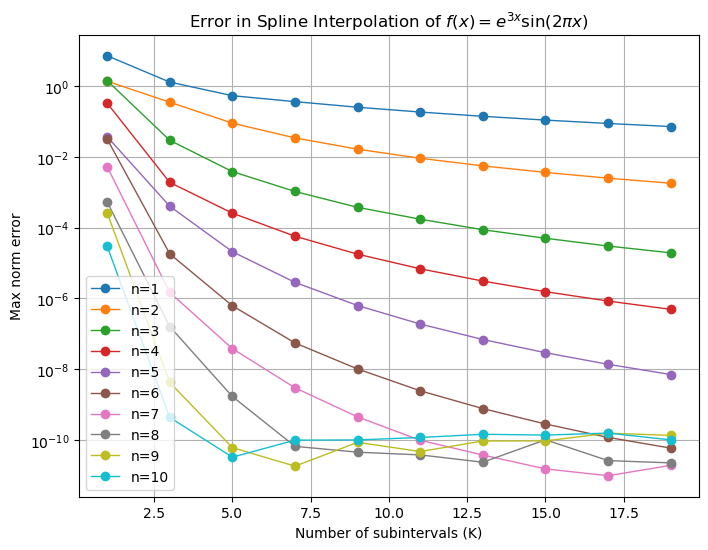

In [262]:
a, b = 0, np.pi/4 # interval
f = lambda x: np.exp(3*x)*np.sin(2*np.pi*x)
K_values = range(1, 21, 2)

for n in tqdm.tqdm(range(1, 11)):
    errs = []
    for K in K_values:
        errs.append(error_splines(K, n, a, b, f, K*n*10))

    errs = np.array(errs)
    plt.semilogy(K_values, errs, 'o-' , label=f'n={n}')
    
plt.xlabel('Number of subintervals (K)')
plt.ylabel('Max norm error')
plt.title(r'Error in Spline Interpolation of $f(x) = e^{3x} \sin(2\pi x)$')
plt.grid(True)
plt.legend()
plt.show()

We se that as $K$ increases, the error approches 0.

We see that the error for piecewise interpolation polynomials reaches $10^{-10}$ with polynomial of degree $10$ per with $5$ subintervals. That is $(K + 1) \cdot (n + 1) = 66$ total nodes. Where as a single polynomial of degree $15$ reaches the same error. So it would seem that for simple functions like $ f(x) = e^{3x}\sin(2x)$ on the intervall $[0,\pi/4]$ a single polynomial converges faster that the piecewise polynomial.


100%|██████████| 10/10 [00:18<00:00,  1.90s/it]


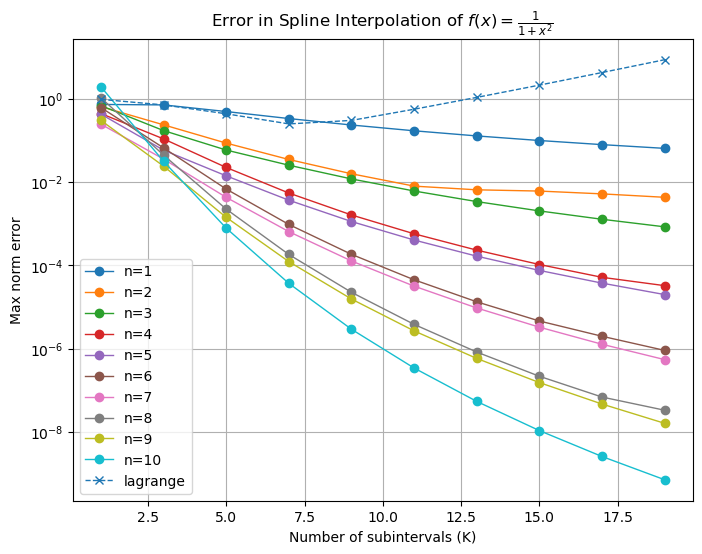

In [270]:
a, b = -5, 5 # interval
f = lambda x: 1 / (1 + x**2) # Runge's function
K_values = range(1, 21, 2)

for n in tqdm.tqdm(range(1, 11)):
    errs = []
    for K in K_values:
        errs.append(error_splines(K, n, a, b, f, K*n*10))

    errs = np.array(errs)
    plt.semilogy(K_values, errs, 'o-' , label=f'n={n}')

errs = []
for K in K_values:
    err, _ = error_lagrange(K, a, b, f, nodes_str='equidistant')
    errs.append(err)
    
errs = np.array(errs)
plt.semilogy(K_values, errs, 'x--' , label=f'lagrange')

plt.xlabel('Number of subintervals (K)')
plt.ylabel('Max norm error')
plt.title(r'Error in Spline Interpolation of $f(x) = \frac{1}{1+x^2}$')
plt.grid(True)
plt.legend()
plt.show()

However, on the more complex function $f(x) = \frac {1}{1+x^2}$ we see that the piecewise interpolation polynomials converge. Where as the normal lagrange interpolation polynomial excperiences Runges phenomenon and diverges. This suggest that piecewise polynomials are well suited to handle more complex functions.

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:20<00:00,  2.02s/it]


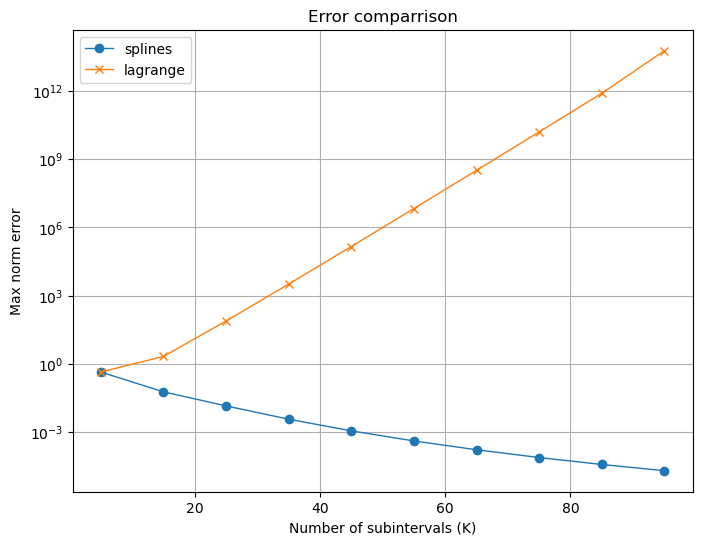

In [261]:
a, b = -5, 5 # interval
f = lambda x: 1 / (1 + x**2) # Runge's function

n = 5
errs_splines = []
errs_lagrange = []
for K in tqdm.tqdm(K_values):
    errs_splines.append(error_splines(K, n, a, b, f, K*n*100))
    err, _ = error_lagrange(K*n, a, b, f, nodes_str='equidistant')
    errs_lagrange.append(err)

errs_splines = np.array(errs_splines)
errs_lagrange = np.array(errs_lagrange)
K_values = np.array(K_values)
plt.semilogy(K_values*n, errs_splines, 'o-' , label=f'splines')
plt.semilogy(K_values*n, errs_lagrange, 'x-' , label=f'lagrange')


plt.xlabel('Number of subintervals (K)')
plt.ylabel('Max norm error')
plt.title(r'Error comparrison')
plt.legend()
plt.grid(True)
plt.show()

Again we see how poorly the normal interpolation poynimial preforms compared to the piecewise polynomial.

___
## Task *d*